# <a>Project - Feature Engineering, Model Selection and Tuning</a>
## <a>Concrete Compressive Strength Prediction <a>
by Sandesh Balyan

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#eda" role="tab" aria-controls="profile">1. Exploratory Data Analysis and Preprocessing<span class="badge badge-primary badge-pill">1</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#1a" role="tab" aria-controls="profile">1.a Univariate anlaysis<span class="badge badge-primary badge-pill">1.a</span></a>  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#1b" role="tab" aria-controls="profile">1.b Bivariate anlaysis<span class="badge badge-primary badge-pill">1.b</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#1b" role="tab" aria-controls="profile">1.c Outlier Detection and handling<span class="badge badge-primary badge-pill">1.c</span></a>     
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. Feature Engineering<span class="badge badge-primary badge-pill">2</span></a>    
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#2a" role="tab" aria-controls="settings">2.a Opportunity for composite feature or dropping a feature<span class="badge badge-primary badge-pill">2.a</span></a>
    <a class="list-group-item list-group-item-action"  data-toggle="list" href="#2b" role="tab" aria-controls="settings">2.b Deciding on complexity of the model<span class="badge badge-primary badge-pill">2.b</span></a>
    <a class="list-group-item list-group-item-action"  data-toggle="list" href="#2c" role="tab" aria-controls="settings">2.c Exploring for Gaussians and clusters<span class="badge badge-primary badge-pill">2.c</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings">3. Model Creation<span class="badge badge-primary badge-pill">3</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings">4. Model Selection and Tuning<span class="badge badge-primary badge-pill">4</span></a> 
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#4a" role="tab" aria-controls="settings">4.a Model Selection<span class="badge badge-primary badge-pill">4.a</span></a>  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#4b" role="tab" aria-controls="settings">4.b Hyperparamter tuning<span class="badge badge-primary badge-pill">4.b</span></a>  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#4c" role="tab" aria-controls="settings">4.c Range Estimate<span class="badge badge-primary badge-pill">4.c</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings">5. Conclusions<span class="badge badge-primary badge-pill">5</span></a>
    </div>

# <a>Description <a>
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
    
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

# <a>Objective<a> 
Modeling of strength of high performance concrete using Machine Learning

# <a id='eda'>1. Exploratory Data Analysis and Preprocessing<a>

##  1.1 Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score, auc
import warnings
warnings.filterwarnings('ignore')
import itertools
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn import metrics


In [2]:
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
data.shape

(1030, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
# unique values in each variable
data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [6]:
data.max()


cement           540.0
slag             359.4
ash              200.1
water            247.0
superplastic      32.2
coarseagg       1145.0
fineagg          992.6
age              365.0
strength          82.6
dtype: float64

In [7]:
data.min()

cement          102.00
slag              0.00
ash               0.00
water           121.80
superplastic      0.00
coarseagg       801.00
fineagg         594.00
age               1.00
strength          2.33
dtype: float64

The minumum value in columns slag, ash and superplastic is 0. There is a possibility of zeros in these columns as cement is mixture of these components and its quite possible that in a certain kind of concretes a particular component has not been used.

In [8]:
data.duplicated().value_counts()

False    1005
True       25
dtype: int64

There are 25 duplicated rows in the dataset. We shall drop these duplicate rows

In [9]:
data = data.drop_duplicates()
data.shape

(1005, 9)

Final number of rows in the dataset are 1005 which is quite low. Total number of rows are 9 out of which last variable is the strengtyh which is our target output variable

In [10]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no nulls in particular in the dataset

## <a id='1a'>1.a Univariate Analysis<a>

### 1.a.1 Distribution of variables

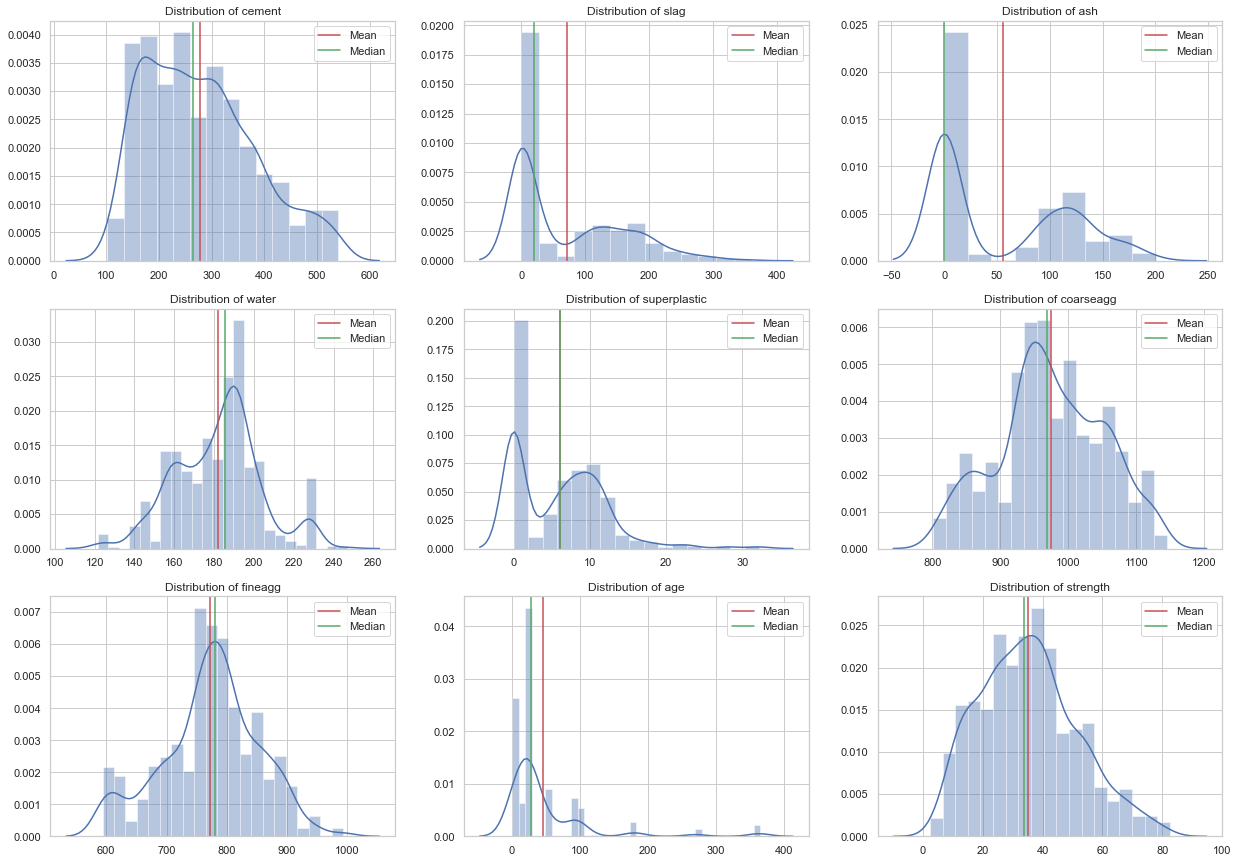

In [11]:
ncol = 3
nrow = len(data.columns) / ncol

fig = plt.figure(1,figsize=(21,15))
for i,col in enumerate(data.columns):
    sns.set(style = 'whitegrid')
    ax=plt.subplot(nrow,ncol,i+1)
    sns.distplot(data[col])
    ax.set_title('Distribution of '+col)
    ax.set_xlabel(None)
    ax.axvline(data[col].mean(),c='r',label='Mean')
    ax.axvline(data[col].median(),c='g',label='Median')
    ax.legend(loc="upper right")

##### Inisghts
1. slag, ash and superplastic -  all 3 have 2 gaussians. one peak is at zero. This means that there exist a product which doesnot make use of these ingridients
2. There are possibly atleat 2 clusters based uopin analysis of these variables one at zero and one elsewhere just a thought
3. No variable is distributed normally except Strength - which is our target variable
4. Variable slag, superplastic , ash and age all are right skewed
5. Variable water is left skewed
6. In almost all the cases mean and median are roughly the same except slag ash, and age
7. Clear grouping of age in at least 3 categories may be <60, 60-150, >150 and at max 5 (one for each peak) - we will anyway group them as these are too discrete numbers and wouldnot make any sense unless binned
8. If required  slag, ash and superplastic can also be grouped into bins to avoid trap of replacing zeros

### 1.a.2 Five Point Summary

In [12]:
#Descriptive statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


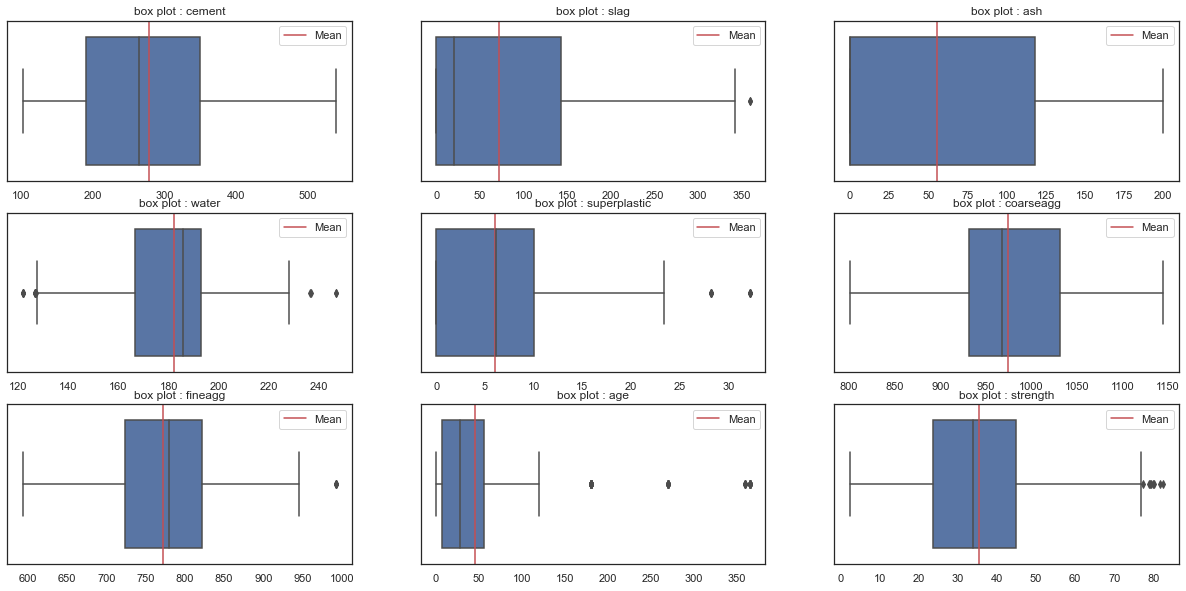

In [13]:
#box plots
ncol = 3
nrow = np.ceil(len(data.columns) / ncol)
fig = plt.figure(1,figsize=(21,10))
for i, col in enumerate(data.columns):
    sns.set(style='white')
    ax = plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[col])
    ax.set_title("box plot : " + col)
    ax.set_xlabel(None)
    ax.axvline(data[col].mean(),c='r',label='Mean',)
    ax.legend(loc='upper right')

##### Insights:
1. Ash has median at zero at least 60 % values are 0
2. Variable 'Age' has most of the outliers
3. Variables 'Slag','water', 'superplstic' and 'fineagg' also have outliers

## <a id='1b'>1.b Bivariate Analysis<a>

### 1.b.1 Pair plot

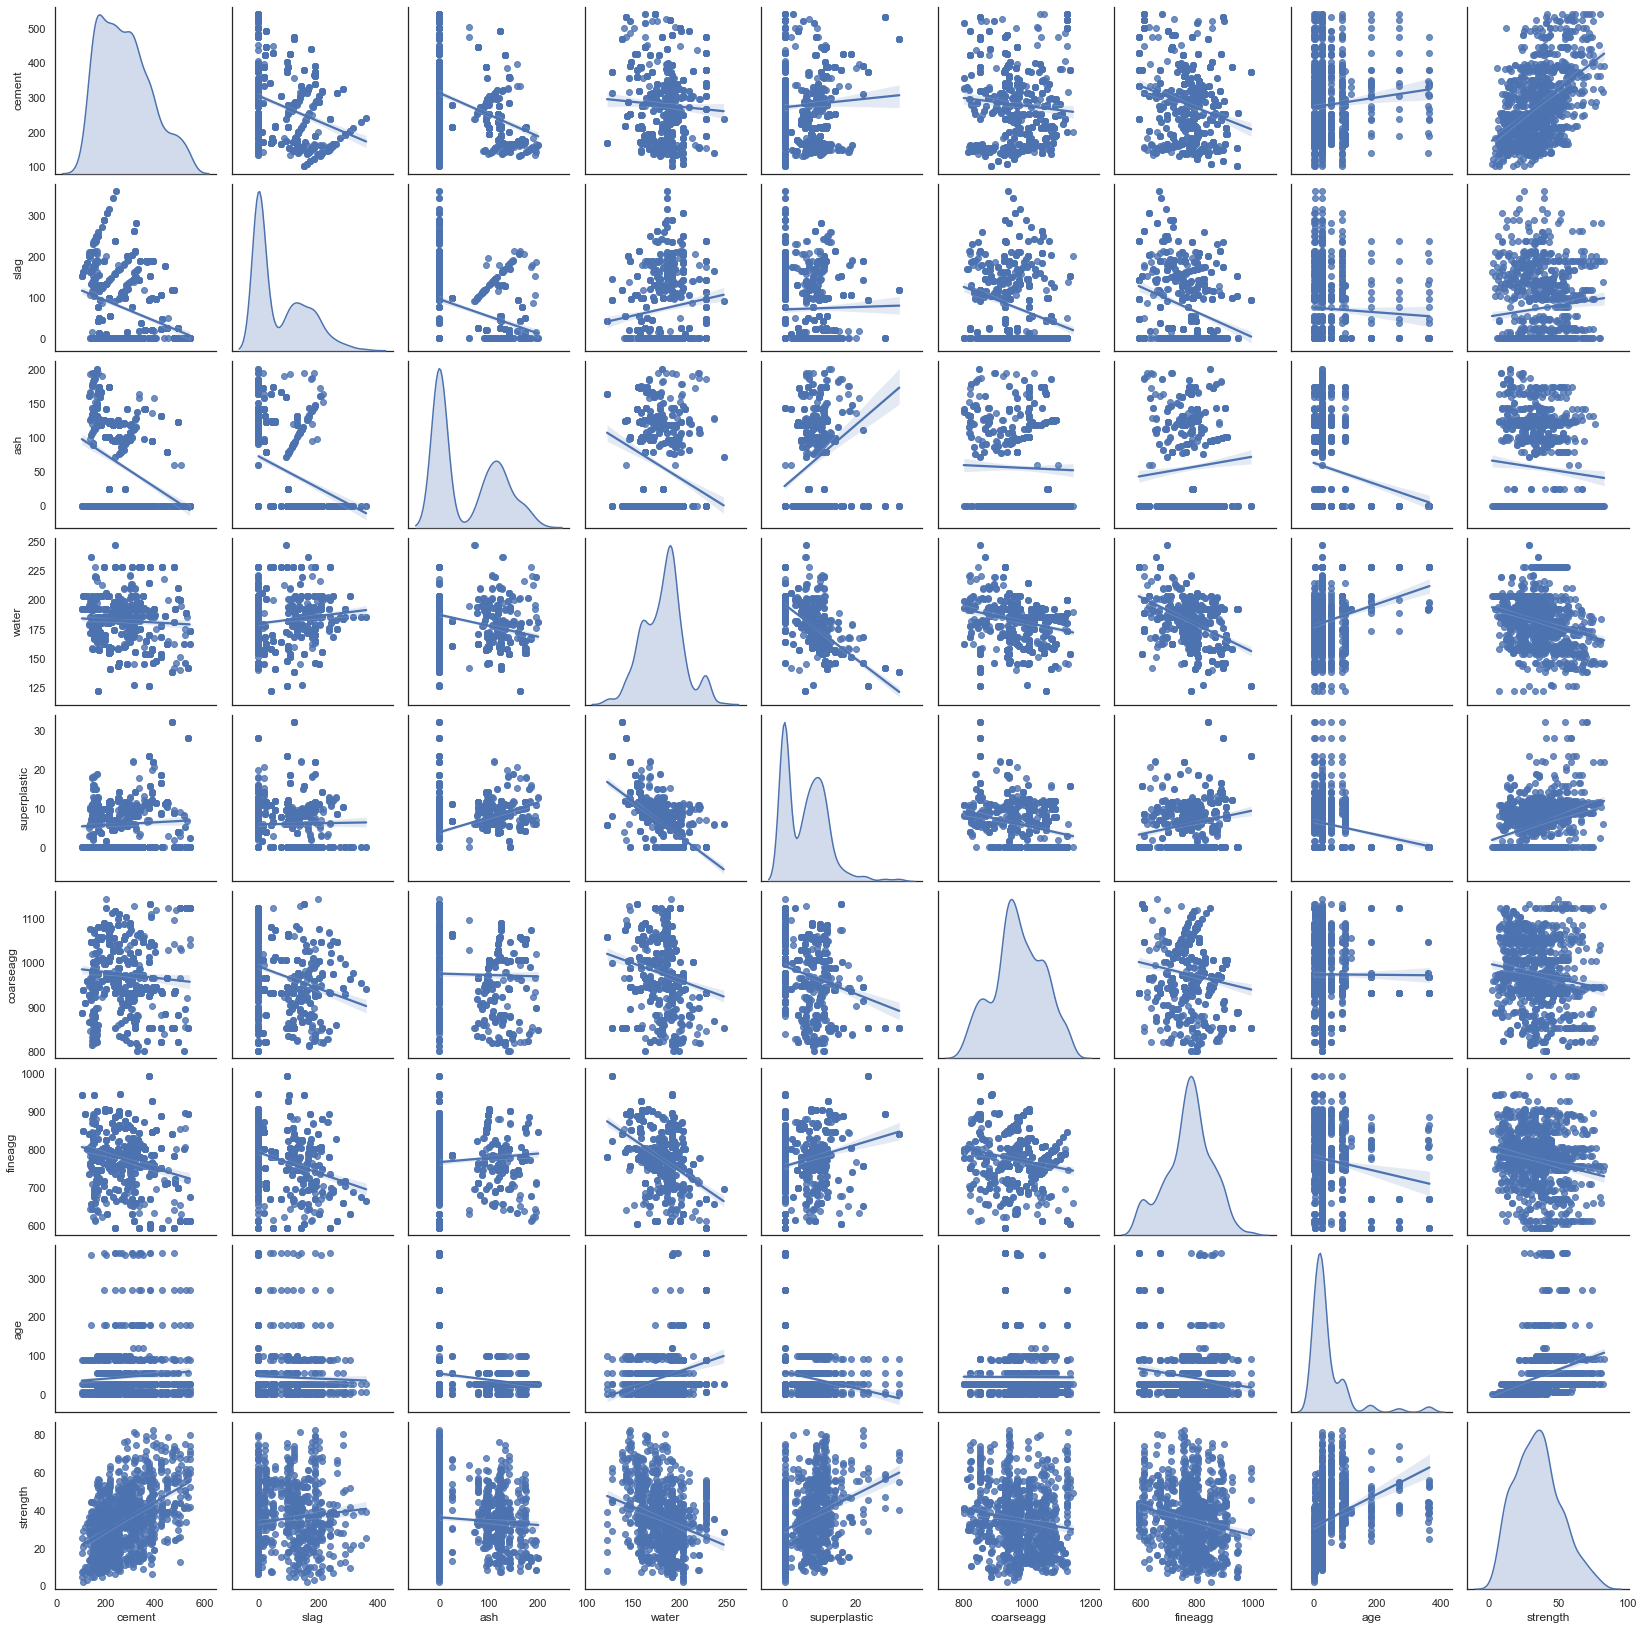

In [14]:
sns.pairplot(data,diag_kind='kde',kind= 'reg')

### 1.b.2 Correlation Matrix

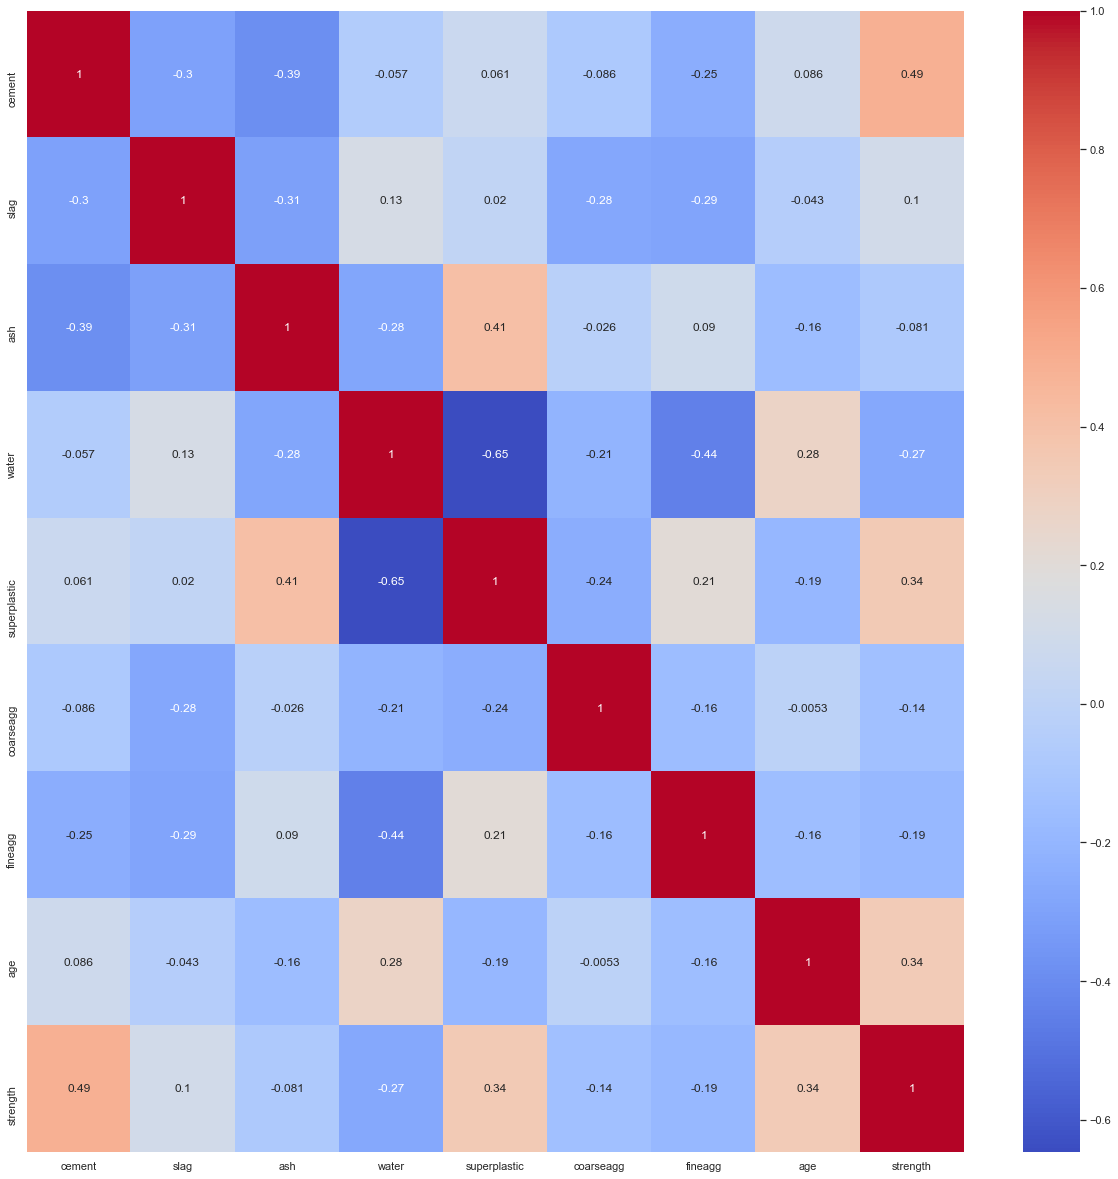

In [15]:
corrMatrix = data.corr()
fig = plt.figure(1,figsize=(21,21))
sns.heatmap(corrMatrix,annot=True,cmap='coolwarm')

##### Insights:
1. ash and superplastic have corr coefficient of 0.41 also both the variables have too many zeros. I guess we can drop one mainly ash as superplastic has good correlation with strength and can explain it better than ash. This decision will be taken in later sections
2. Variable superplastic also explains fine agg to a smaller extent(not evident from pairplot though looks pretty spread out)
3. Variable cement has good correlation with target variable strength
4. Variable ash, coarseaggregate, water and fine aggreg have almost no correlation with strength
5. Variable slag also has almost no correlation but can be considered
###### 6. Most of the variables seems to have very low correlation among each other. There is no variable which have conclusive correlation with target variable or with other independent variables


### 1.b.3 Relationship between Numerical Variables and Target Variables

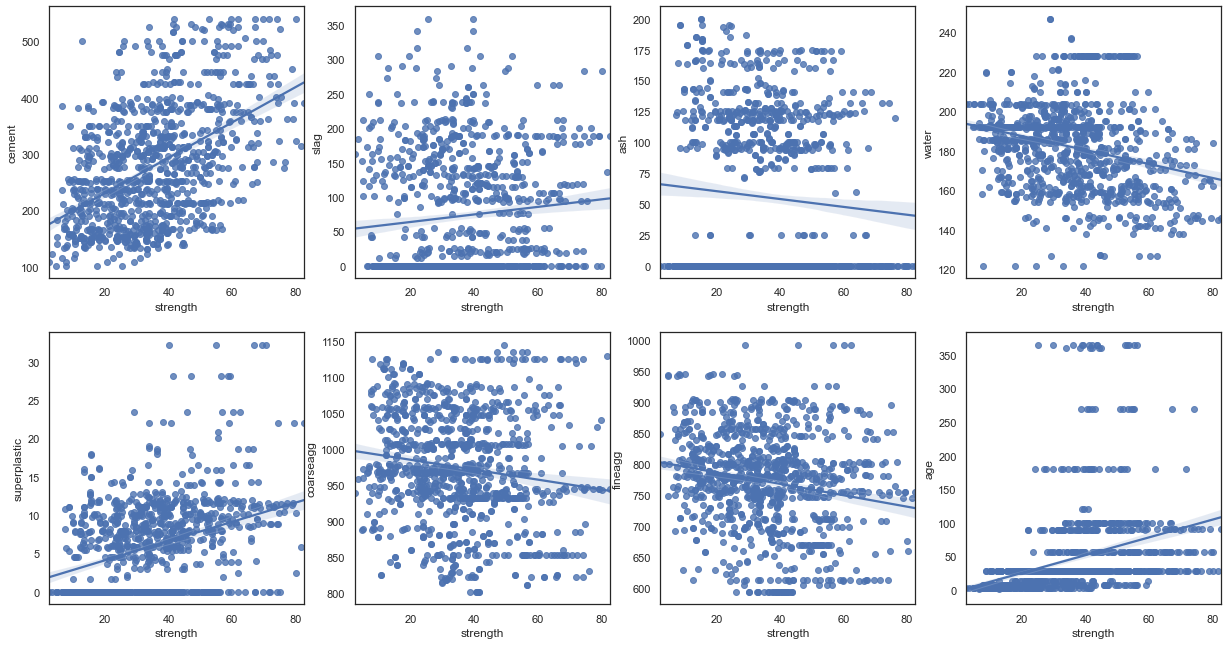

In [16]:
ncol = 4
nrow = np.ceil(len(data.columns[:-1])/ncol)
fig = plt.figure(1,figsize=(21,11))
for i, col in enumerate(data.columns[:-1]):
    ax = plt.subplot(nrow,ncol,i+1)
    sns.regplot(x=data['strength'],y=data[col])

##### Insights:
1. Cement has a strong relatonship with target variable strength. It is important predictor
2. Almost all variable have some positive or negative relationship with Strength
3. Data is pretty scattered but trend line indicates some relationship between all the variables and strength.
###### 4. From these it looks like all the variables shall be used for modelling

### 1.b.4 Bucketing variable 'Age'
The age variable has number of days as the age of concrete. These range from 1 to 365. These values can be binned together for analysing. We can bin them together in bins of 3 months.

This will help us better analyse effect of age on Taregt variable and other variables

In [17]:
df = data.copy()

In [18]:
df['age_bin'] = pd.cut(df['age'],bins=4,labels=['3month','3-6month','6-9month','9-12month'])

In [19]:
df['age_bin'].unique()

onth, 3-6month, 9-12month, 6-9month]
Categories (4, object): onth < 3-6month < 6-9month < 9-12month]

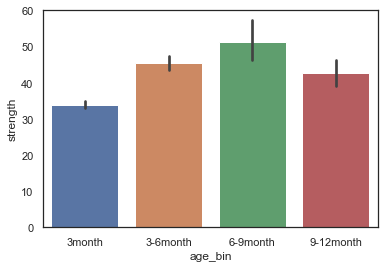

In [20]:
#strength vs age:
sns.barplot(x=df['age_bin'],y=df['strength'])

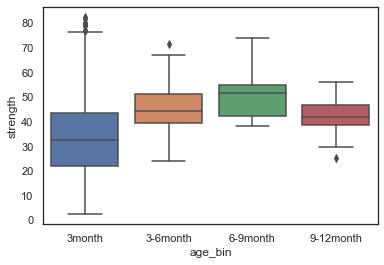

In [21]:
sns.boxplot(x=df['age_bin'],y=df['strength'])

##### Insights:
1. Mean strength for all the groups is different. It is evident from central line in each box plot
2. Mean strenghth increases with increase in mean age of the cement and then decreases. It is minimum for age 9-12 months
3. Strenmgth is pretty well spread from lowest to highest for age < 3 months
###### 4. This variable could be a decisive predictor

## <a id='1c'>1.c Outliers Detection and Handling<a>

### 1.c.1 Detecting Outliers

In [22]:
def handle_outliers(x):
    IQR = data[x].quantile(0.75) - data[x].quantile(0.25)
    min_range = data[x].quantile(0.25) - 1.5*IQR
    max_range = data[x].quantile(0.75) + 1.5*IQR
    
    outlier = data[(data[x]<min_range) | (data[x]>max_range)]
    return outlier

In [23]:
df_outlier = pd.DataFrame()
list_dict = []
for feature in data.columns[:-1]:
    df = handle_outliers(feature)
    x = {'Feature name': feature,
        'Total count': data[feature].count(),
         'Outlier Count': len(df),
         '% Outliers': (len(df)/len(data)*100),
         'min_outlier': df[feature].min(),
         'max_outlier': df[feature].max()
        }
    list_dict.append(x)

df_outlier = df_outlier.append(list_dict, True)
print('Outlier analysis on numerical variables')
df_outlier

Outlier analysis on numerical variables


,Feature name,Total count,Outlier Count,% Outliers,min_outlier,max_outlier
0,cement,1005,0,0.000000,NaN,NaN
1,slag,1005,2,0.199005,359.4,359.4
2,ash,1005,0,0.000000,NaN,NaN
3,water,1005,15,1.492537,121.8,247.0
4,superplastic,1005,10,0.995025,28.2,32.2
5,coarseagg,1005,0,0.000000,NaN,NaN
6,fineagg,1005,5,0.497512,992.6,992.6
7,age,1005,59,5.870647,180.0,365.0


##### Insights:
1. There are very less number of outliers in the entire dataset
2. Age has maximum number if outliers

### 1.c.2 Imputing Outliers with the Median  value

In [24]:
data_copy = data.copy()
for feature in data.columns[:-1]:
    df = handle_outliers(feature)
    lst_replace = list(np.array(df[feature]))
    data[feature] = data[feature].replace(lst_replace,data[feature].median())

### 1.c.3 Rechecking Outliers

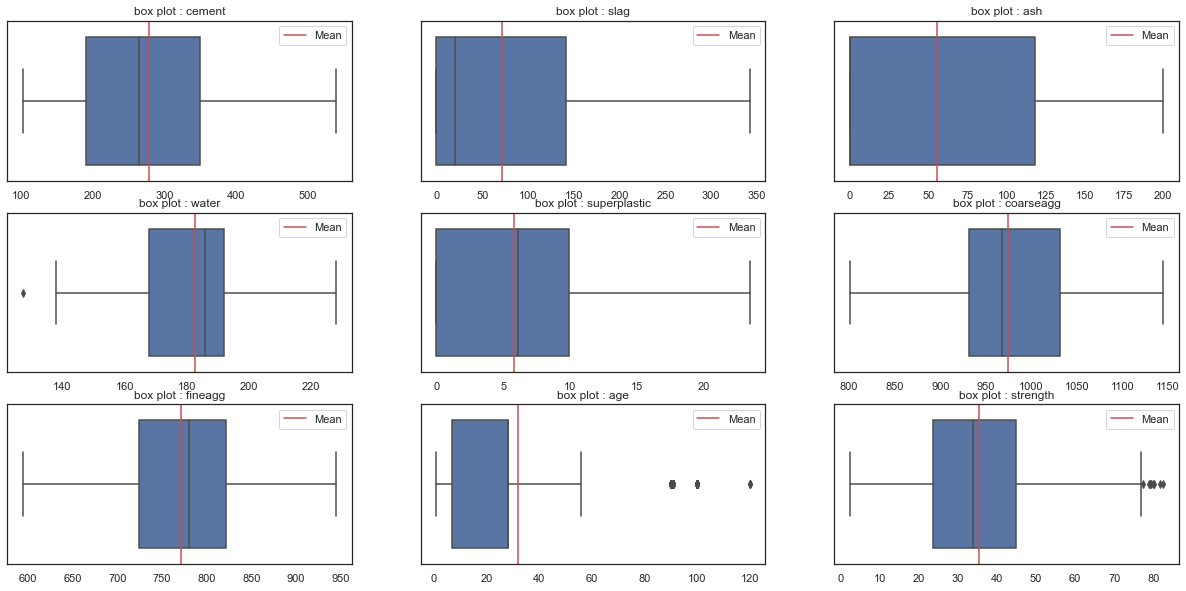

In [25]:
ncol = 3
nrow = np.ceil(len(data.columns) / ncol)
fig = plt.figure(1,figsize=(21,10))
for i, col in enumerate(data.columns):
    sns.set(style='white')
    ax = plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[col])
    ax.set_title("box plot : " + col)
    ax.set_xlabel(None)
    ax.axvline(data[col].mean(),c='r',label='Mean',)
    ax.legend(loc='upper right')

##### Note:
There are still some outliers in age and water. but the count is quite less and hence can be ignored unattended

Last plot is for strength and we will not take care of the outliers in Target Variable

### 1.c.4 Pending boxplot for scaling

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

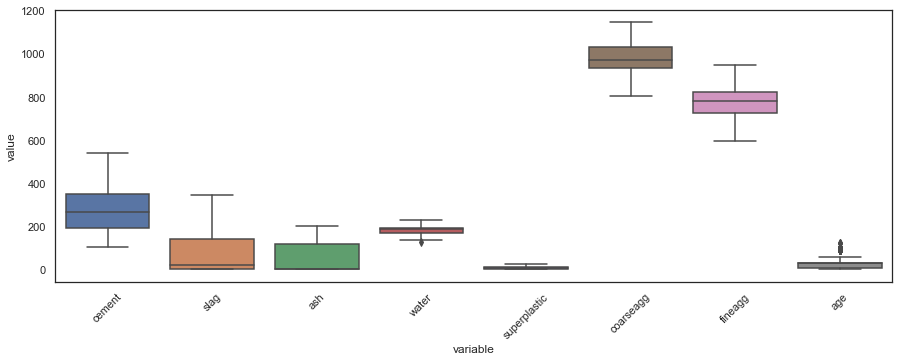

In [26]:
fig = plt.figure(1, (15, 5))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable",y="value", data=pd.melt(data[data.columns[:-1]]))
plt.xticks(rotation=45)

##### Insights:

We can see that there is huge difference in the scales of each variable, hence scaling of data would be required for certain algorithms

# <a id='2FE'>2. Feature Engineering<a>

## <a id='2a'>2.a Opportunity for composite feature or dropping a feature<a>
    
In this section we will try to try different feature extractin and selection methods like correlation matrix, PCA, Recursive  Feature elimination to get anidea about non important features and new features possibility

In [27]:
col_names = list(data.columns[:-1])
col_names

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

###  2.a.1 Splitting the Dataset

In [28]:
X = data.drop('strength',axis=1)
y = data['strength']

In [29]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [30]:
# check distribution of broken datasets
print("Fraction of data points train dataset {}".format(len(X_train)/len(data)))
print("Fraction of target variables in train dataset {}".format(len(y_train)/len(data)))
print("Fraction of data points test dataset {}".format(len(X_test)/len(data)))
print("Fraction of target variables in test dataset {}".format(len(y_test)/len(data)))


Fraction of data points train dataset 0.7492537313432835
Fraction of target variables in train dataset 0.7492537313432835
Fraction of data points test dataset 0.2507462686567164
Fraction of target variables in test dataset 0.2507462686567164


We can see that after splitting the dataset fraction of datapoints are balanced in train as well as test dataset

### 2.a.2 Correlation Matrix

We wil use correlation matrix to check independence of features and multicollinearity if any

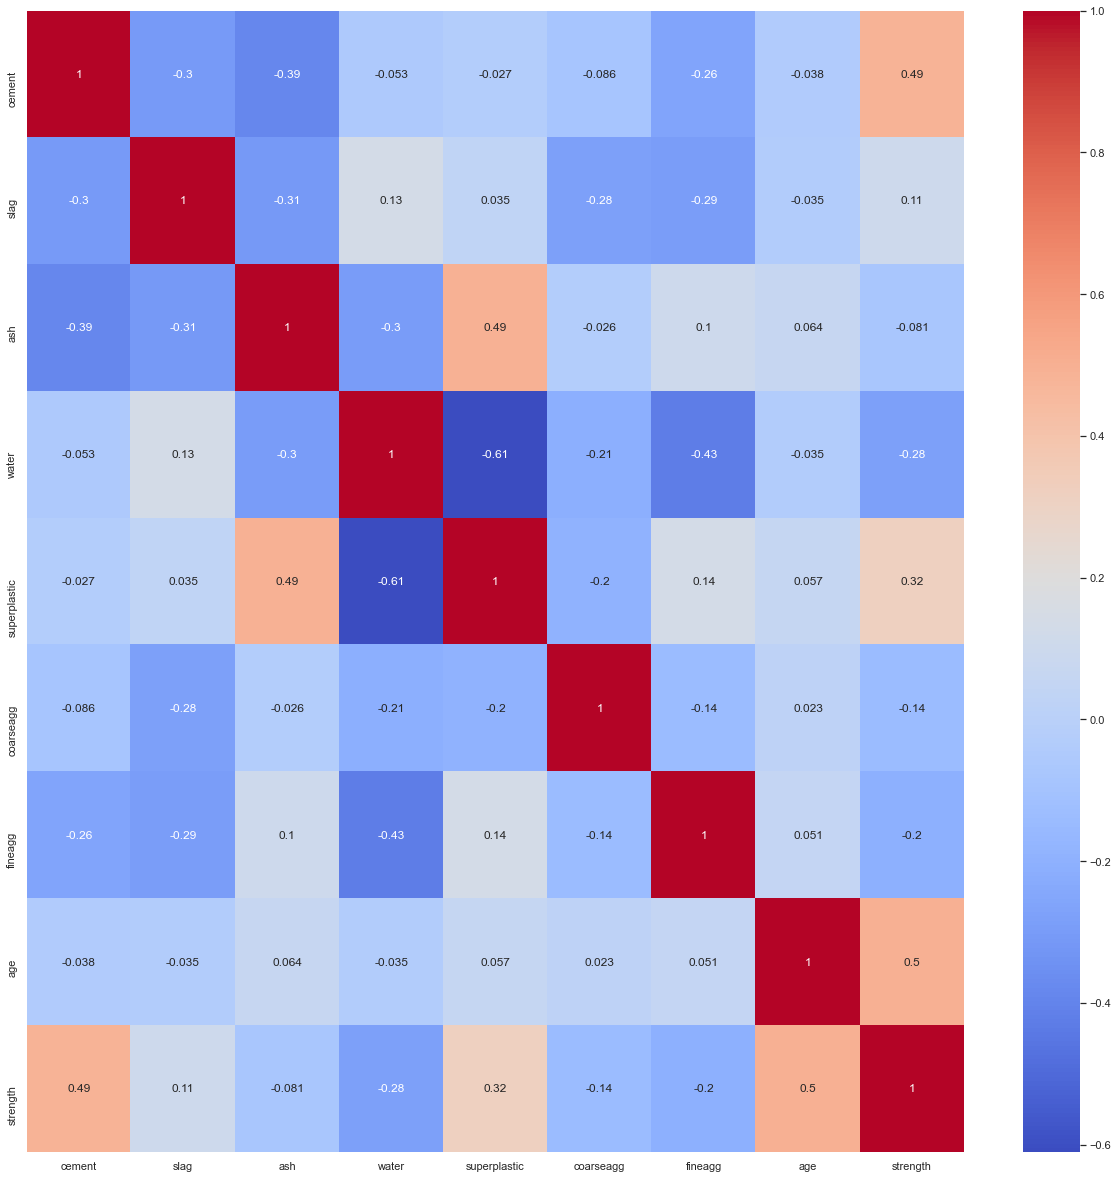

In [31]:
corrMatrix = data.corr()
fig = plt.figure(1,figsize=(21,21))
sns.heatmap(corrMatrix,annot=True,cmap='coolwarm')

#####  Inisghts:
1. There is very little multicollinearity between features int his dataset
2. Features Superplastic and Age has a correlation coefficient of 0.49. Although its not high but we can plan to dfrop one of these features after further anlaysis
3. Features cement, superplasic and age have good correlation with Strength. hence these might be important features in prediction

### 2.a.3 Feature importance using Linear regresison

We will build linear regression and find coefficient of all the variables

Most imortant features willl have high value of coefficients and least important will have 0 or near to 0

In [32]:
sc = StandardScaler()
X_train_scaled = X_train.copy()
df_to_scale = X_train[col_names]
df_to_scale  = sc.fit_transform(df_to_scale.values)
X_train_scaled[col_names] = df_to_scale
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
866,-0.063676,0.373024,0.390492,1.375721,0.582729,-0.915826,-1.115363,-0.165002
890,-1.249224,-0.853398,1.930762,-0.066816,1.707075,-1.771111,1.489950,-0.165002
160,0.486859,-0.853398,-0.871267,0.467831,-1.103791,0.056387,0.733733,-0.165002
700,-0.474678,-0.853398,0.947513,0.629233,0.039295,0.714602,-0.125778,-0.165002
612,1.075362,-0.853398,-0.871267,0.467831,-1.103791,-0.442858,-0.120677,-1.049442


In [33]:
X_test_scaled = X_test.copy()
df_to_scale = X_test[col_names]
df_to_scale  = sc.fit_transform(df_to_scale.values)
X_test_scaled[col_names] = df_to_scale
X_test_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
699,1.976282,0.626967,-0.84929,-0.039057,0.611342,-1.522579,-0.032884,-0.096819
628,0.203849,-0.791813,-0.84929,0.195399,-0.990805,1.392099,-0.191998,-0.915294
616,1.120761,0.367813,-0.84929,-1.149137,1.187394,-1.522579,1.802660,0.994482
510,0.429611,1.745988,-0.84929,-1.254403,1.583430,-1.522579,1.226030,-1.071194
343,-0.811092,2.673927,-0.84929,0.181045,-0.990805,0.267393,-1.015574,-0.096819


In [34]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.6184130939819883

In [35]:
for i,feature in enumerate(col_names):
    print("Coefficient of Feature {0} : {1}".format(feature,model.coef_[i]))

Coefficient of Feature cement : 10.941623998278567
Coefficient of Feature slag : 5.790867569207814
Coefficient of Feature ash : 2.219001416846398
Coefficient of Feature water : -3.004220845639778
Coefficient of Feature superplastic : 1.890865896806118
Coefficient of Feature coarseagg : -0.4476347154818406
Coefficient of Feature fineagg : -1.1839066739423618
Coefficient of Feature age : 8.57419165795952


##### Insights
1. Unable to determine from coefficients the feature importance as none of the coefficient is zero
2. Only variable 'coarseagg' is near 0 and can be selected for dropping

### 2.a.4 Recursive Feature Elimination

Since this is a regression problem we will try our hands with Simple linear regression. This is not the final model building process. 

We will use Recursive Feature elimination using this basic model to check and to get an idea of feature importance.

This shall be used to detect feature importance, to find out most important features and possibility to drop a feature

In [36]:
rfe = RFE(model,4)
rfe_fit = rfe.fit(X=X,y=y)

In [37]:
for i,feature in enumerate(col_names):
    print('Ranking of Feature {0}:{1}'.format(feature,rfe_fit.ranking_[i]))


Ranking of Feature cement:1
Ranking of Feature slag:2
Ranking of Feature ash:3
Ranking of Feature water:1
Ranking of Feature superplastic:1
Ranking of Feature coarseagg:5
Ranking of Feature fineagg:4
Ranking of Feature age:1


##### Inisghts
1. We selected only 4 fetaures through recursive elimination
2. Most important features come out to be cement, water, superplastic and age
3. slag is ranked 2, ash is ranked 3
4. fineagg and coarseagg are ranked 4 and 5 respectively. We will find in later sections but these 2 features seems to be potential candidate for dropping

### 2.a.5 PCA

We will use principal component analysis to check possibilities of composite features. 

PCA will help us in determining how many variables will explain 95% of the total variance in the data. Since PCA builds linear composite features, we can reduce dimensionality and select appropriate number of composite features

In [38]:
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_
explained_variance

array([1.29258583e+04, 9.62509897e+03, 6.80411753e+03, 4.22967157e+03,
       1.27215126e+03, 7.58746304e+02, 8.06703332e+01, 1.04897342e+01])

Text(0.5, 1.0, 'PCA cummulative Explained variance vs features')

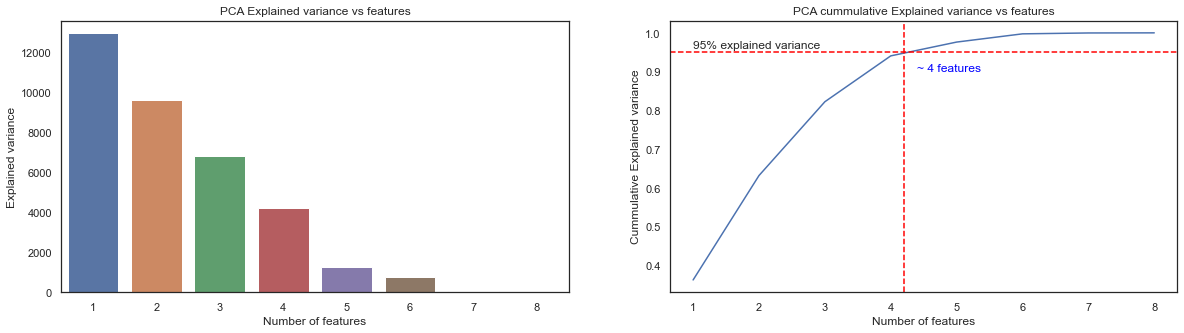

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
x = np.arange(1,9)
y1 = explained_variance

sns.barplot(x,y1,ax=ax1)
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Explained variance')
ax1.set_title('PCA Explained variance vs features')

sns.set(style='whitegrid')
sns.lineplot(x,np.cumsum(pca.explained_variance_ratio_),ax=ax2)
ax2.axhline(0.95, ls='--',c='red')
ax2.text(1,0.96,'95% explained variance')
ax2.axvline(4.2, ls='--',c='red')
ax2.text(4.4,0.9,'~ 4 features',c='blue')

ax2.set_xlabel('Number of features')
ax2.set_ylabel('Cummulative Explained variance')
ax2.set_title('PCA cummulative Explained variance vs features')

#####  Insights:
1. It can be observed that 95% variance in data is explained by 4 features which is 50% of actual number of features

## <a id='2b'>2.b Deciding on complexity of the model<a>

In this section we will build linear regression model using polyniomial features which create additional features of different degree. It will still be  a linear regression because coefficients are still linear.

In [40]:
#Creating polynimial features
from sklearn.preprocessing import PolynomialFeatures

In [41]:
for i in range(1,5):
    sc = StandardScaler()
    poly = PolynomialFeatures(degree=i)
    model = LinearRegression()
    pipe = Pipeline([('scale',sc),
                     ('transformation',poly),
                    ('model',model)])
    pipe.fit(X_train,y_train)
    print('Accuracy score with Polynomial features degree {0} : Train Accuracy :{1} , Test Accuracy : {2}'.format(i,pipe.score(X_train,y_train),pipe.score(X_test,y_test)))

Accuracy score with Polynomial features degree 1 : Train Accuracy :0.7264975814135815 , Test Accuracy : 0.6303214131346484
Accuracy score with Polynomial features degree 2 : Train Accuracy :0.8558899085615592 , Test Accuracy : 0.8162933518225715
Accuracy score with Polynomial features degree 3 : Train Accuracy :0.9402697794130807 , Test Accuracy : 0.7991037569736884
Accuracy score with Polynomial features degree 4 : Train Accuracy :0.978825413274032 , Test Accuracy : -70.53163500526298


##### Inisghts:
1. We can see that as we increase the degree of polynomial features accuracy scores on train and test increases. This could also be leading to Overfitting
2. This is certaain that we get higher accurcy with degree 2 than the basic data
3. for degree 3 accuracy on test set drops sharply indicating an overfitmodel

##### Conclusion
We can work with features of degree 2 as it gives comparable accuracy on train and test dataset

## <a id='2c'>2.c Exploring for Gaussians and clusters<a>

1. Plot KDE plot for each feature to check gaussians
2. Use kmeans clustering to determine clusters

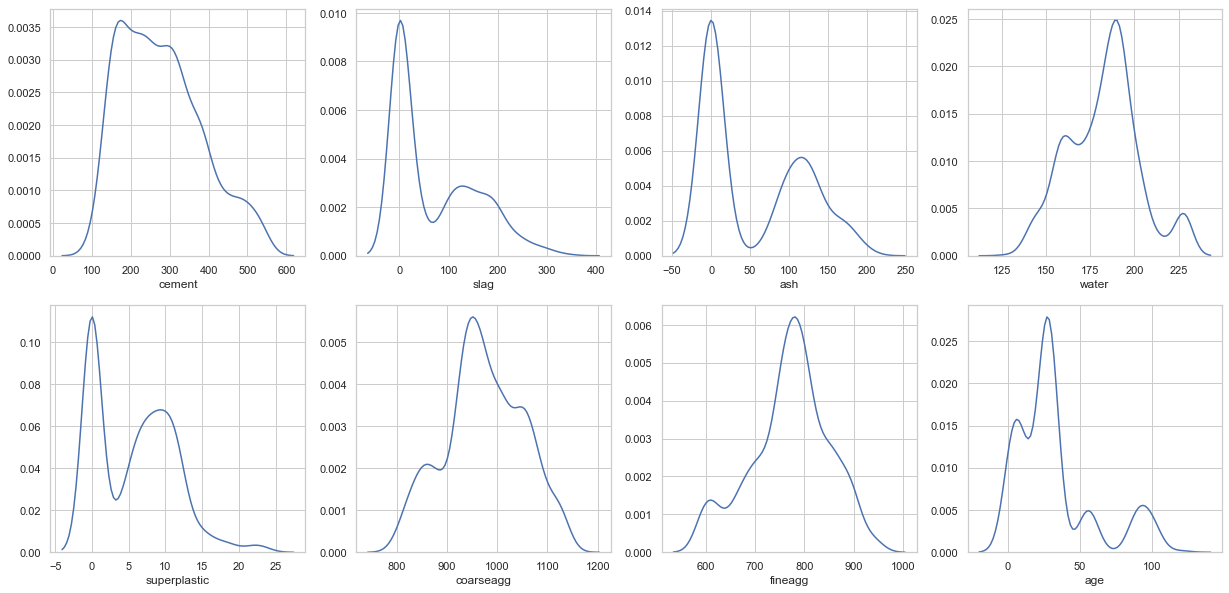

In [42]:
fig = plt.figure(1,figsize=(21,10))
nrow=2
ncol=4
for i,feature in enumerate(col_names):
    ax = plt.subplot(nrow,ncol,i+1)
    sns.distplot(data[feature],hist=False)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

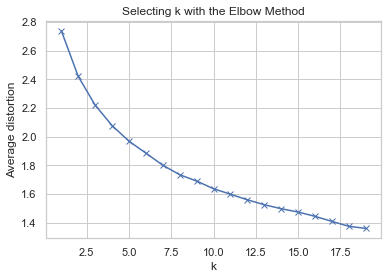

In [43]:
from scipy.spatial.distance import cdist
from scipy.stats import zscore
X_scaled = X.apply(zscore)
clusters=range(1,20)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_scaled)
    prediction=model.predict(X_scaled)
    meanDistortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#####  Insights:
1. From the curve elbow is not clear. First sharp elbow is at 15. Hence there could be 15 cluseters in this dataset.
2. Althought from kde plots there seems to be some overlapping Gaussians but it is difficult to determine clear number of clusters from  elbow method

# <a id='3'>3. Model Creation<a>

1. In this section we will explore all possible algorithms to get some insights into Importance of each feature.
2. We shall not select any feature
    


In [44]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

##### 3.1 We will define 2 functions which will derive feature importance for various algorithms.
1. Evaluation: Use R2 and RMSE-Root Mean Squared Error as the model evaluation technique
2. Objective: At the end a dataframe with model name, evaluation parameters and importance for all features will be returned

In [45]:
# Algorithms which returns feature importances shall use this function
def feature_importance(model,modelName):
    cols = ['Model Name','R Squared', 'RMSE', 'MAE', 'MSE'] + col_names
    #fitting model
    model.fit(X_train_scaled,y_train)
    y_pred= model.predict(X_test_scaled)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    lst = [modelName,r2_score(y_test,y_pred)*100,RMSE,MAE,MSE]
    for i, feature in enumerate(col_names):
        lst.append(model.feature_importances_[i])
    
    dfFeatureImp = pd.DataFrame([lst],columns=cols)
    return dfFeatureImp

In [46]:
# As linear regression, lasso and ridge works on feature importance using coefficients of the variables.
# This function shall be used for these algorithsm
def feature_importance_lr(model,modelName):
    cols = ['Model Name','R Squared', 'RMSE', 'MAE', 'MSE'] + col_names
    #fitting model
    model.fit(X_train_scaled,y_train)
    
    y_pred= model.predict(X_test_scaled)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    lst = [modelName,r2_score(y_test,y_pred)*100,RMSE,MAE,MSE]
    
    for i, feature in enumerate(col_names):
        lst.append(model.coef_[i])
    
    dfFeatureImp = pd.DataFrame([lst],columns=cols)
    return dfFeatureImp

###  3.1 Linear Regressor Feature Importance

In [47]:
from sklearn.linear_model import LinearRegression
dfFeature = pd.DataFrame()
model = LinearRegression()
dfFeature = dfFeature.append(feature_importance_lr(model,'LinearRegression'))

dfFeature

,Model Name,R Squared,RMSE,MAE,MSE,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,LinearRegression,61.841309,9.375293,7.299033,87.896127,10.941624,5.790868,2.219001,-3.004221,1.890866,-0.447635,-1.183907,8.574192


In [48]:
#Ridge
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.33)
dfFeature = dfFeature.append(feature_importance_lr(model,'Ridge'))
dfFeature

,Model Name,R Squared,RMSE,MAE,MSE,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,LinearRegression,61.841309,9.375293,7.299033,87.896127,10.941624,5.790868,2.219001,-3.004221,1.890866,-0.447635,-1.183907,8.574192
0,Ridge,61.869127,9.371876,7.297663,87.832052,10.899827,5.752318,2.184797,-3.027837,1.891990,-0.471326,-1.215514,8.571361


In [49]:
#LASSO
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.6)
dfFeature = dfFeature.append(feature_importance_lr(model,'LASSO'))
dfFeature

,Model Name,R Squared,RMSE,MAE,MSE,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,LinearRegression,61.841309,9.375293,7.299033,87.896127,10.941624,5.790868,2.219001,-3.004221,1.890866,-0.447635,-1.183907,8.574192
0,Ridge,61.869127,9.371876,7.297663,87.832052,10.899827,5.752318,2.184797,-3.027837,1.891990,-0.471326,-1.215514,8.571361
0,LASSO,60.995089,9.478678,7.521435,89.845343,8.915274,3.795507,0.000000,-2.322048,2.865202,-0.265347,-1.267748,7.928900


###  3.2 Decision Tree Regressor Feature Importance

In [50]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
dfFeature = pd.concat([dfFeature,feature_importance(model,'Decision Tree')])
dfFeature

,Model Name,R Squared,RMSE,MAE,MSE,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,LinearRegression,61.841309,9.375293,7.299033,87.896127,10.941624,5.790868,2.219001,-3.004221,1.890866,-0.447635,-1.183907,8.574192
0,Ridge,61.869127,9.371876,7.297663,87.832052,10.899827,5.752318,2.184797,-3.027837,1.891990,-0.471326,-1.215514,8.571361
0,LASSO,60.995089,9.478678,7.521435,89.845343,8.915274,3.795507,0.000000,-2.322048,2.865202,-0.265347,-1.267748,7.928900
0,Decision Tree,68.892417,8.464889,6.211204,71.654348,0.340332,0.069520,0.026637,0.119128,0.037656,0.040909,0.049407,0.316413


 ###  3.3 Random Forest Regressor Feature Importance

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
dfFeature = pd.concat([dfFeature,feature_importance(model,'Random Forest')])
dfFeature

,Model Name,R Squared,RMSE,MAE,MSE,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,LinearRegression,61.841309,9.375293,7.299033,87.896127,10.941624,5.790868,2.219001,-3.004221,1.890866,-0.447635,-1.183907,8.574192
0,Ridge,61.869127,9.371876,7.297663,87.832052,10.899827,5.752318,2.184797,-3.027837,1.891990,-0.471326,-1.215514,8.571361
0,LASSO,60.995089,9.478678,7.521435,89.845343,8.915274,3.795507,0.000000,-2.322048,2.865202,-0.265347,-1.267748,7.928900
0,Decision Tree,68.892417,8.464889,6.211204,71.654348,0.340332,0.069520,0.026637,0.119128,0.037656,0.040909,0.049407,0.316413
0,Random Forest,84.003175,6.070228,4.776870,36.847673,0.352931,0.076349,0.017011,0.106770,0.046569,0.035202,0.040032,0.325135


### 3.4 KNN regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
model = KNeighborsRegressor()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
results = permutation_importance(model, X_train_scaled,y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# print('Linear regressor Accuracy: {0:.3f} %'.format(model.score(X_test_scaled,y_test)*100))

MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
lst = ['KNN Regressor',r2_score(y_test,y_pred)*100,RMSE,MAE,MSE] + list(importance)


#lst = ['KNN Regressor', model.score(X_test_scaled,y_test)*100] + list(importance)

cols = ['Model Name','R Squared', 'RMSE', 'MAE', 'MSE'] + col_names
df = pd.DataFrame([lst],columns=cols)
dfFeature = pd.concat([dfFeature,df])
dfFeature


,Model Name,R Squared,RMSE,MAE,MSE,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,LinearRegression,61.841309,9.375293,7.299033,87.896127,10.941624,5.790868,2.219001,-3.004221,1.890866,-0.447635,-1.183907,8.574192
0,Ridge,61.869127,9.371876,7.297663,87.832052,10.899827,5.752318,2.184797,-3.027837,1.891990,-0.471326,-1.215514,8.571361
0,LASSO,60.995089,9.478678,7.521435,89.845343,8.915274,3.795507,0.000000,-2.322048,2.865202,-0.265347,-1.267748,7.928900
0,Decision Tree,68.892417,8.464889,6.211204,71.654348,0.340332,0.069520,0.026637,0.119128,0.037656,0.040909,0.049407,0.316413
0,Random Forest,84.003175,6.070228,4.776870,36.847673,0.352931,0.076349,0.017011,0.106770,0.046569,0.035202,0.040032,0.325135
0,KNN Regressor,71.128731,8.154946,6.283841,66.503140,89.484910,34.410510,25.390706,35.727553,43.126240,22.307761,37.233718,128.469925


### 3.5 Gradient Boosting Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
dfFeature = pd.concat([dfFeature,feature_importance(model,'Gradient Boosting')])
dfFeature

,Model Name,R Squared,RMSE,MAE,MSE,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,LinearRegression,61.841309,9.375293,7.299033,87.896127,10.941624,5.790868,2.219001,-3.004221,1.890866,-0.447635,-1.183907,8.574192
0,Ridge,61.869127,9.371876,7.297663,87.832052,10.899827,5.752318,2.184797,-3.027837,1.891990,-0.471326,-1.215514,8.571361
0,LASSO,60.995089,9.478678,7.521435,89.845343,8.915274,3.795507,0.000000,-2.322048,2.865202,-0.265347,-1.267748,7.928900
0,Decision Tree,68.892417,8.464889,6.211204,71.654348,0.340332,0.069520,0.026637,0.119128,0.037656,0.040909,0.049407,0.316413
0,Random Forest,84.003175,6.070228,4.776870,36.847673,0.352931,0.076349,0.017011,0.106770,0.046569,0.035202,0.040032,0.325135
0,KNN Regressor,71.128731,8.154946,6.283841,66.503140,89.484910,34.410510,25.390706,35.727553,43.126240,22.307761,37.233718,128.469925
0,Gradient Boosting,84.156688,6.041032,4.761164,36.494067,0.344121,0.083057,0.011776,0.099899,0.049654,0.017266,0.029502,0.364727


### 3.6 Analysis of Feature Importances

Text(0.5, 1.0, 'RMSE vs Model Name')

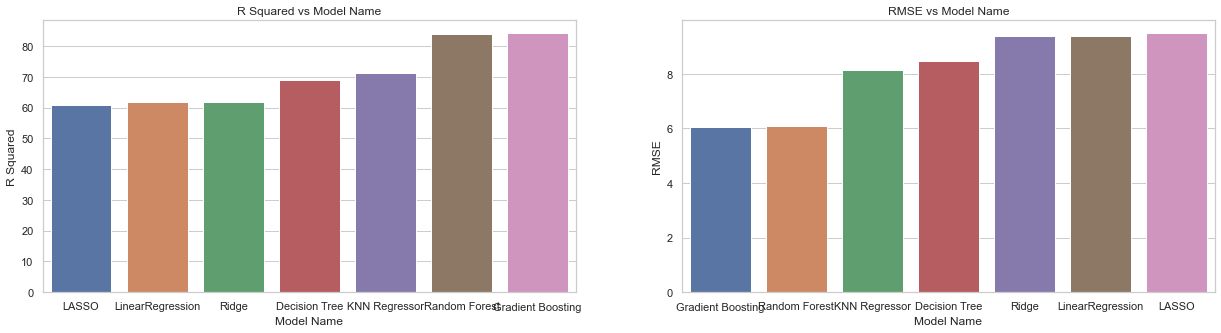

In [54]:
barData1 = dfFeature[['Model Name','R Squared','RMSE']]
barData1 = barData1.sort_values(by='R Squared')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(21,5))

sns.barplot(x=barData1['Model Name'], y= barData1['R Squared'],ax=ax1)
ax1.set_title('R Squared vs Model Name')

barData1 = barData1.sort_values(by='RMSE')
sns.barplot(x=barData1['Model Name'], y= barData1['RMSE'],ax=ax2)
ax2.set_title('RMSE vs Model Name')

##### Insights:

1. Among all the base models Random forest regressor has the best R squared and accuracy and least Root Mean Squared Error

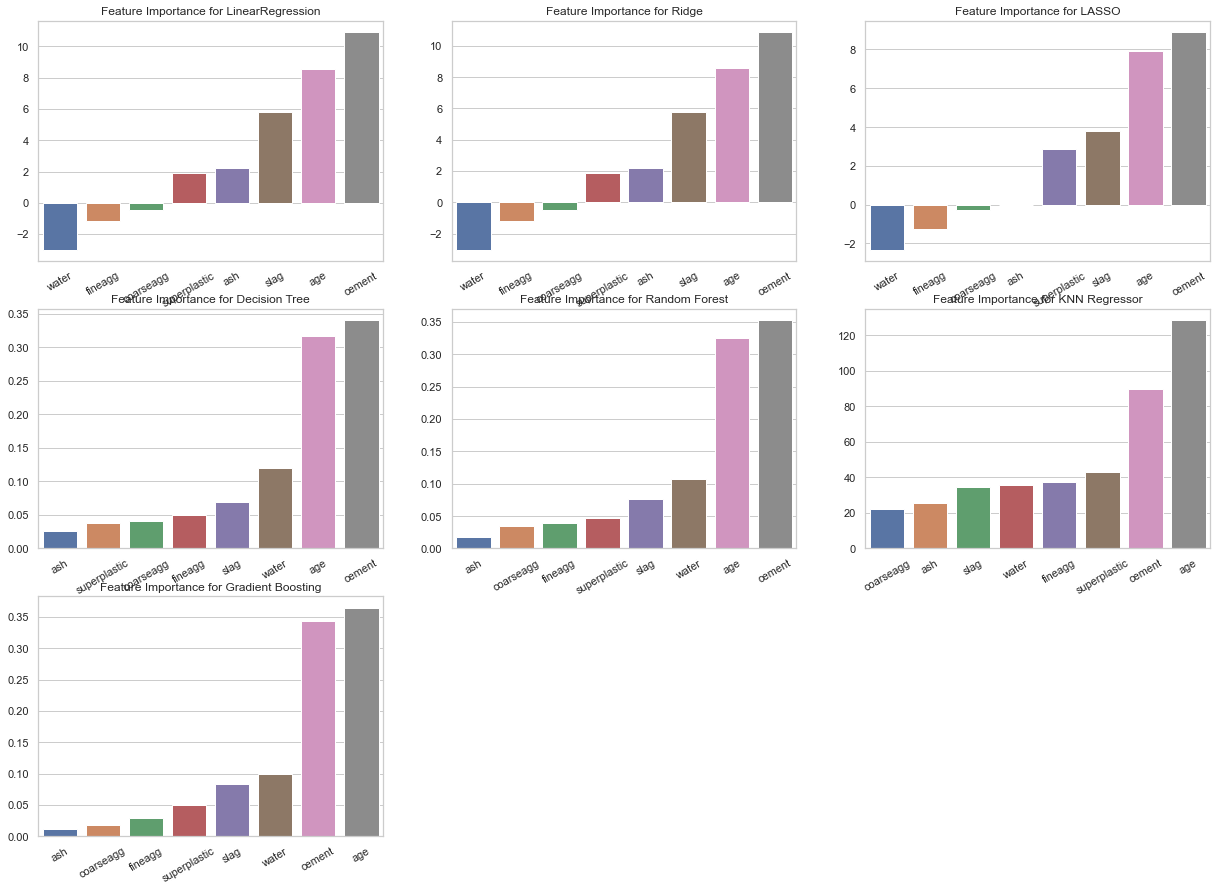

In [55]:
# Feature importance comparision
plotData = dfFeature.drop(['R Squared','RMSE','MAE','MSE'],axis=1)
len(plotData)
nrow=3
ncol=3
fig = plt.figure(1,figsize=(21,15))
for i in range(0,len(plotData)):
    ax = plt.subplot(nrow,ncol,i+1)
    #sns.set(style='white')
    df = pd.DataFrame(plotData.iloc[i,1:].sort_values())
    xVal = list(df.index)
    yVal = list(df[0])
    sns.barplot(x=xVal,y=yVal)
    plt.xticks(rotation=30)
    ax.set_title('Feature Importance for ' + plotData.iloc[i,0])



##### Insights:
Top 4 features in each basic algorithm
1. Linear Regresion : Cement, Age, slag and water are top 4 features 
2. Ridge : Cement, Age, slag and water are top 4 features. since Ridge can be used to select features as well based on coefficients. Coarsagg seems to be almost negligible
3. Lasso:  Cement, Age, slag and water are top 4 features. Ash has coefficient 0 hence least or no importance in predicting through Ridge
4. decision Tree: Cement, Age, water and slag are top 4 features. Compared to other features water is ranked higher than slag by decision trees
5. Random Forest: Cement, Age, water and slag are top 4 features
6. KNN Regressor: KNN has most distince feature recommendation . Age, cement, superplastic and fineagg seems to be the best features. Superplastic and fineagg were not predicted by any of the feature

---------------------------------------------------------
### Conclusion:

Cement, Age, slag and water can be considered as the most important features in this problem

## <a id='4'>4. Model Selection and Tuning<a>

In this section we will build all possible algorithms with various combinations of features and PCA and check their performance to select the best algorithm

## <a id='4a'>4.a Model Selection<a>

### 4.a.1 Define all models
We will define all models with some intial values for hyperparameters and then use pipelines to fit them.

In [56]:
lin_reg = LinearRegression(n_jobs=-1)
ridge_reg = Ridge()
lasso_reg = Lasso()
knn_reg = KNeighborsRegressor(n_neighbors=7,n_jobs=-1)
svr_reg = SVR()
random_forest_reg = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=8, n_jobs=-1)
gradboost_reg = GradientBoostingRegressor(n_estimators=200, max_depth=5, min_samples_split=8)
adaboost_reg = AdaBoostRegressor(n_estimators=200)
extratree_reg = ExtraTreesRegressor(n_estimators=200, max_depth=5, min_samples_split=8, n_jobs=-1)

name_regressors = ['lin_reg','ridge_reg', 'lasso_reg', 'svr_reg', 'random_forest_reg','gradboost_reg','adaboost_reg','extratree_reg']
lst_all_regressors = [lin_reg,ridge_reg, lasso_reg, svr_reg, random_forest_reg,gradboost_reg,adaboost_reg,extratree_reg]

In [57]:
# below function would loop thorigh all the models in the list and create a pipeline and fit the same.
#a list of scores for all algorithms is sent as return value
# This function us used when there are no feature selection
def process_pipeline_1(name):
    sc = StandardScaler()
    lst = [name]
    for i,model in enumerate(lst_all_regressors):
        
        pipe = Pipeline([('scaler',sc),
                         ('model',model)])
        pipe.fit(X_train,y_train)
        y_pred = pipe.predict(X_test)
        r_sqrd = r2_score(y_test,y_pred)
        lst.append(round(r_sqrd,5))
    
    return lst

In [58]:
# below function would loop thorigh all the models in the list and create a pipeline and fit the same.
#a list of scores for all algorithms is sent as return value
# This function us used when there are feature selection and pca used with all algorithms
def process_pipeline(name, feat_sel):
    sc = StandardScaler()
    lst = [name]
    for i,model in enumerate(lst_all_regressors):
        
        pipe = Pipeline([('scaler',sc),
                         ('feat_select',feat_sel),
                         ('model',model)])
        pipe.fit(X_train,y_train)
        y_pred = pipe.predict(X_test)
        r_sqrd = r2_score(y_test,y_pred)
        lst.append(round(r_sqrd,5))
    
    return lst

In [59]:
# Here we will define all possible cases of with feature selection and without, feature extraction using PCA
# we will log all the scores of each algo in separate pipelines

from sklearn.feature_selection import SelectKBest

df_scores = pd.DataFrame(columns=['Pipe']+name_regressors)

df_scores.loc[len(df_scores)]=process_pipeline_1('pipe_1_scaled_all')
df_scores.loc[len(df_scores)]=process_pipeline('pipe_1_scaled_best_2',SelectKBest(k=2))
df_scores.loc[len(df_scores)]=process_pipeline('pipe_2_scaled_best_4',SelectKBest(k=4))
df_scores.loc[len(df_scores)]=process_pipeline('pipe_3_scaled_best_6',SelectKBest(k=6))
df_scores.loc[len(df_scores)]=process_pipeline('pipe_4_scaled_best_8',SelectKBest(k=8))
df_scores.loc[len(df_scores)]=process_pipeline('pipe_5_pca_2',PCA(n_components=2))
df_scores.loc[len(df_scores)]=process_pipeline('pipe_6_pca_4',PCA(n_components=4))
df_scores.loc[len(df_scores)]=process_pipeline('pipe_7_pca_6',PCA(n_components=6))
df_scores.loc[len(df_scores)]=process_pipeline('pipe_8_pca_8',PCA(n_components=8))



df_scores

,Pipe,lin_reg,ridge_reg,lasso_reg,svr_reg,random_forest_reg,gradboost_reg,adaboost_reg,extratree_reg
0,pipe_1_scaled_all,0.63032,0.63102,0.60356,0.65259,0.78363,0.90831,0.76108,0.72936
1,pipe_1_scaled_best_2,0.16253,0.16269,0.15134,0.18314,0.22226,0.23513,0.17713,0.20737
2,pipe_2_scaled_best_4,0.28285,0.28334,0.26780,0.29166,0.32496,0.29311,0.28886,0.30650
3,pipe_3_scaled_best_6,0.59878,0.59904,0.57953,0.61809,0.74900,0.87577,0.67343,0.68938
4,pipe_4_scaled_best_8,0.63032,0.63102,0.60356,0.65259,0.77708,0.90800,0.74131,0.72223
5,pipe_5_pca_2,0.00286,0.00286,-0.00672,0.09675,0.17375,0.27490,0.08918,0.14662
6,pipe_6_pca_4,0.33745,0.33765,0.34286,0.35711,0.43391,0.51718,0.36607,0.37463
7,pipe_7_pca_6,0.60825,0.60834,0.59468,0.63849,0.71288,0.82890,0.69716,0.65788
8,pipe_8_pca_8,0.63032,0.63102,0.59468,0.65259,0.72537,0.85527,0.73956,0.66358


### 4.2  Assessment of all algorithms
In this section we will plot a line plot. Each line represents an algorithms and how it fits in various scenarios which are represented as pipelines

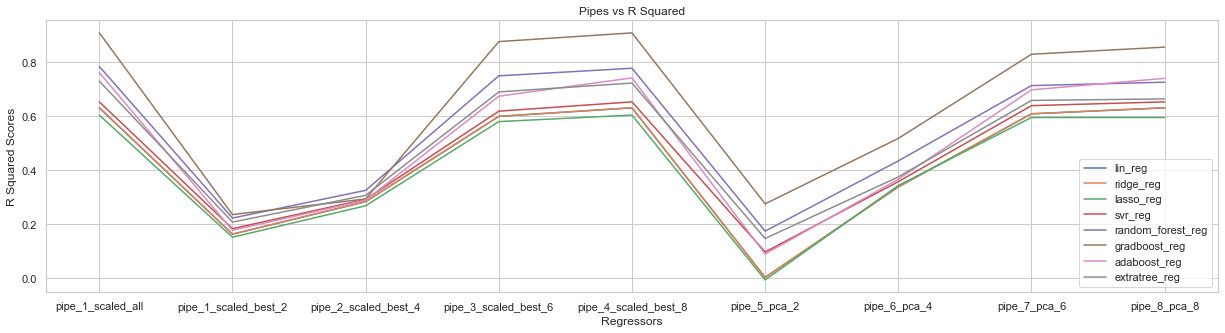

In [60]:
fig = plt.figure(1,figsize=(21,5))
for regressor in name_regressors:
    ax = plt.subplot(1,1,1)
    sns.lineplot(x='Pipe',y=regressor,data=df_scores,axes=ax,label=regressor,)
    sns.set_palette("husl")
    ax.set_xlabel('Regressors')
    ax.set_ylabel('R Squared Scores')
    ax.set_title('Pipes vs R Squared')

##### Inisghts:
1. From line plot and scores table we can see that 2 pipelines perform best. a.)pipe_1_all_scaled and b.)pipe_4_scaled_best_8. 
2. Also Gradient Boosting regressor seems to be the best regressor in current scenario
3. Best accuracy is received when all the features are used in model building in both the scenarios. This could be a sign of overfitting. We will check Gradient boosting regressor in the next section
4. pipe_3_scaled_best_6 pipeline seems to be second best again with gradient boosting regressor. This pipeline used 6 features implying that there are 2 features whicc can be dropped.
5. pipe_8_pca_8 is the 4th best. but this is complex algorithm as PCA is built using 8 complex features. 
-----------------------------------------------------------
In next section we will check Gradient boosting regressor for these 3 pipelines for overfitting to select a model for hyperparameter tuning 

### 4.3 Checking Overfitting in Selected Algorithm (Gradient Boosting Regressor)

In [61]:
def overfitting_check(name, pipe):
    lst = [name]
    pipe.fit(X_train,y_train)
    y_pred_test = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)
    lst.append(r2_score(y_train,y_pred_train))
    lst.append(r2_score(y_test,y_pred_test))
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    lst.append(RMSE)
    return lst

In [62]:
# gradeint boosting regressor used in pipe1 and pipe 4 is:
df_performance = pd.DataFrame(columns=['pipe','train accuracy','test accuracy','RMSE'])
gradboost_reg = GradientBoostingRegressor(n_estimators=200, max_depth=5, min_samples_split=8)

pipe_1_scaled_all = Pipeline([('scaler',sc),('regressor',gradboost_reg)])
pipe_3_scaled_best_6 = Pipeline([('scaler',sc),('feat_sel',SelectKBest(k=6)),('regressor',gradboost_reg)])
pipe_4_scaled_best_8 = Pipeline([('scaler',sc),('feat_sel',SelectKBest(k=8)),('regressor',gradboost_reg)])
pipe_8_pca_8 = Pipeline([('scaler',sc),('feat_sel',PCA(n_components=8)),('regressor',gradboost_reg)])

df_performance.loc[len(df_performance)] = overfitting_check('pipe_1_scaled_all',pipe_1_scaled_all)
df_performance.loc[len(df_performance)] = overfitting_check('pipe_3_scaled_best_6',pipe_3_scaled_best_6)
df_performance.loc[len(df_performance)] = overfitting_check('pipe_4_scaled_best_8',pipe_4_scaled_best_8)
df_performance.loc[len(df_performance)] = overfitting_check('pipe_8_pca_8',pipe_8_pca_8)

df_performance

,pipe,train accuracy,test accuracy,RMSE
0,pipe_1_scaled_all,0.987588,0.908501,4.590881
1,pipe_3_scaled_best_6,0.983474,0.879162,5.275812
2,pipe_4_scaled_best_8,0.987588,0.908623,4.587831
3,pipe_8_pca_8,0.990058,0.854619,5.786840


##### Insights:
1. There is 3% drop in test accuracy when 6 features are used with Gradient boosting instead of 8
2. Highest test accuracy is for pipe_1_scaled_all and pipe_4_scaled_best_8. Both are virtually the same
3. RMSE is also lowest for pipe_1_scaled_all using gradient boosting regressor
4. There still seems to be some overfitting as there is a difference in train accuracy and test accuracy. We will handle this in hyperparameter tuning. Accuracy in test set may drop when tuning is done but it will reduce overfitting as well

#### CONCLUSION
##### We can work with simplest gradient boosting algorithm using all features and try to improve test accuracy using hyperparameter tuning

## <a id='4b'>4.b Hyperparamter tuning<a>


As decided in section 4.a we will use gradient boosting regressor for hyperparamter tuning

we will use GridSearchCV and RandomSearchCV for tuning the hyperparameters

Hyperparamters used in original regressor were 
1. n_estimators=200
2. max_depth=5
3. min_samples_split=8

gradboost_reg = GradientBoostingRegressor(n_estimators=200, max_depth=5, min_samples_split=8)

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [64]:
#Available hyperparamters:
gradboost_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### 4.b.1 Hyperparameter tuning using GridsearchCV

In [65]:
n_est = np.arange(40,201,20)
depth = np.arange(4,11)
sample_split = np.arange(5,20)
leaf_node = np.arange(5,20)

hyperparameter = {    
    'n_estimators': n_est,
    'max_depth': depth,
    'min_samples_split': sample_split,
    'max_leaf_nodes':leaf_node,
}

regressor = GradientBoostingRegressor()

grid = GridSearchCV(regressor,param_grid=hyperparameter,cv=5,n_jobs=-1)

grid.fit(X_train_scaled, y_train)

print('\nbest params-> {}'.format(grid.best_params_))
print('best score-> {}'.format(grid.best_score_))
print('test score -> {}'.format(grid.score(X_test_scaled,y_test)))


best params-> {'max_depth': 6, 'max_leaf_nodes': 13, 'min_samples_split': 8, 'n_estimators': 200}
best score-> 0.9113980087882773
test score -> 0.8584354840624698


In [66]:
print('test score -> {}'.format(grid.score(X_test_scaled,y_test)))

test score -> 0.8584354840624698


##### Insights:
1. Best Test score in 91.1%
2. Best parameters are: 'max_depth': 6, 'max_leaf_nodes': 13, 'min_samples_split': 8, 'n_estimators': 190

In [67]:
df_grid_results= pd.DataFrame(grid.cv_results_)

In [68]:
df_grid_results.sort_values('rank_test_score').reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.418652,0.015305,0.003124,0.006249,6,13,8,200,"{'max_depth': 6, 'max_leaf_nodes': 13, 'min_sa...",0.916108,0.891309,0.907322,0.945183,0.897067,0.911398,0.018916,1
1,0.421776,0.009880,0.000000,0.000000,6,13,11,200,"{'max_depth': 6, 'max_leaf_nodes': 13, 'min_sa...",0.914269,0.888594,0.909469,0.946801,0.895470,0.910921,0.020189,2
2,0.381162,0.015930,0.000000,0.000000,5,12,5,200,"{'max_depth': 5, 'max_leaf_nodes': 12, 'min_sa...",0.913730,0.888800,0.910350,0.941359,0.899663,0.910780,0.017610,3
3,0.409279,0.011690,0.000000,0.000000,6,13,12,200,"{'max_depth': 6, 'max_leaf_nodes': 13, 'min_sa...",0.912794,0.889768,0.907725,0.945159,0.896075,0.910304,0.019245,4
4,0.406155,0.009880,0.000000,0.000000,6,13,9,200,"{'max_depth': 6, 'max_leaf_nodes': 13, 'min_sa...",0.912963,0.889524,0.910416,0.942916,0.895276,0.910219,0.018592,5


#### 4.b.2 Hyperparameter tuning using Random Search CV

In [69]:
n_est = np.arange(40,201,20)
depth = np.arange(4,11)
sample_split = np.arange(5,20)
leaf_node = np.arange(5,20)
#
hyperparameter = {    
    'n_estimators': n_est,
    'max_depth': depth,   
    'min_samples_split': sample_split,
    'max_leaf_nodes':leaf_node,
}

regressor = GradientBoostingRegressor()

randomsearch = RandomizedSearchCV(regressor,param_distributions=hyperparameter,cv=5,n_jobs=-1)

randomsearch.fit(X_train_scaled, y_train)

print('\nbest params-> {}'.format(randomsearch.best_params_))
print('best score-> {}'.format(randomsearch.best_score_))
print('test score -> {}'.format(randomsearch.score(X_test_scaled,y_test)))


best params-> {'n_estimators': 200, 'min_samples_split': 8, 'max_leaf_nodes': 13, 'max_depth': 6}
best score-> 0.9114559936146176
test score -> 0.8583331002119978


##### Insights:
1. Best parameters in Randomised SearchCV are  'n_estimators': 190, 'min_samples_split': 19, 'max_leaf_nodes': 9, 'max_depth': 9
2. Best Test accuracy of 90.8%

In [70]:
df_random_results= pd.DataFrame(randomsearch.cv_results_)
df_random_results.sort_values('rank_test_score').reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_leaf_nodes,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.413665,0.025382,0.003124,0.006248,200,8,13,6,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.916570,0.890770,0.907151,0.945460,0.897329,0.911456,0.019123,1
1,0.402507,0.011690,0.003124,0.006249,180,14,14,10,"{'n_estimators': 180, 'min_samples_split': 14,...",0.909412,0.893938,0.899599,0.938819,0.891426,0.906639,0.017237,2
2,0.343670,0.017113,0.003124,0.006248,140,16,14,10,"{'n_estimators': 140, 'min_samples_split': 16,...",0.907131,0.890846,0.898571,0.939896,0.889545,0.905198,0.018453,3
3,0.284309,0.015305,0.006248,0.007652,120,6,17,9,"{'n_estimators': 120, 'min_samples_split': 6, ...",0.906730,0.885182,0.889153,0.937775,0.892088,0.902186,0.019226,4
4,0.284174,0.011728,0.003125,0.006249,140,11,10,10,"{'n_estimators': 140, 'min_samples_split': 11,...",0.908792,0.891948,0.896149,0.937582,0.875118,0.901918,0.020833,5


## <a id='4c'>4.c Range Estimate<a>

Range estimate with 95% confidence level

In [71]:
final_regressor = GradientBoostingRegressor(n_estimators=200, min_samples_split=8, max_depth=6,max_leaf_nodes= 13)
final_regressor.fit(X_train_scaled,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=13,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
print('Train Score : {0:.4f}'.format(final_regressor.score(X_train_scaled,y_train)))
print('Test Score : {0:.4f}'.format(final_regressor.score(X_test_scaled,y_test)))

Train Score : 0.9836
Test Score : 0.8587


In [73]:
# To get range estimate we will use bootstrap sampling - sampling with replacement
# We will create 1000 such samples
# We will pick only 50% of the samples in each iteratio0n
from sklearn.utils import resample
n_iterations = 1000              
n_size = int(len(data) * 0.50)    
values = data.values
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    final_regressor.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = final_regressor.predict(test[:,:-1])
    score = r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    #print(score)
    stats.append(score)

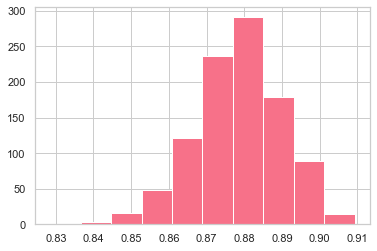

Gradient boosting regressor : 95% confidence interval 85.4% and 89.9%


In [74]:
plt.hist(stats)
plt.show()

alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('Gradient boosting regressor : {0:.0f}% confidence interval {1:.1f}% and {2:.1f}%'.format(alpha*100, lower*100, upper*100))

##### Insights:
1. 95% confidence interval is 85.4% to 89.9%

# <a id='5'>5. Conclusions<a>

#### 1. 'Gradient Boosting regressor' seems to be the best algorithm for this problem

#### 2. Best prameters to be used for gradient boosting regressor are :  
1. 'max_depth': 6, 
2. 'max_leaf_nodes': 13, 
3. 'min_samples_split': 8, 
4. 'n_estimators': 200

#### 3. Hyperparameter tuning technique: Both 'GridSearchCV' and 'RandomSearchCV' generates the same kind of results and same range estimate. There is slight difference in the parameter suggestion from both techniques.

#### 4. Range estimate for 95% confidence interval is [85.4% , 89.9%]

#### 5. Feature selection: 
1. No 2 features have correlation coefficients higher than 0.5. hence there is no much correlation between any of the indpendent varaiables
2. PCA initially suggests 95% explained variance in data with 4 features but the best performance is obtained with 8 PCA features (refer pipe_8_pca_8)
3. Algorithms with best number of features 2,4,6,8 were also tried but Basic algorithm using all the features comes out to be the best for the current feature, hence no variables were dropped while building gradient boosting algorithms
4. Polynomial features with degree=2 also provided good score however, it also generates overfitting and high computational complexity, hence this was not tried.

##### 6. Others:
1. Before gridsearch CV accuracy was  > 90% in test set however accuracy in train set was 98% which indicated towards overfitting, hence scores generated using Gridsearch are more reliable as it provides almost similar accuracy in test and train set